In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.shape    

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [8]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [9]:
df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Salary', ylabel='Density'>

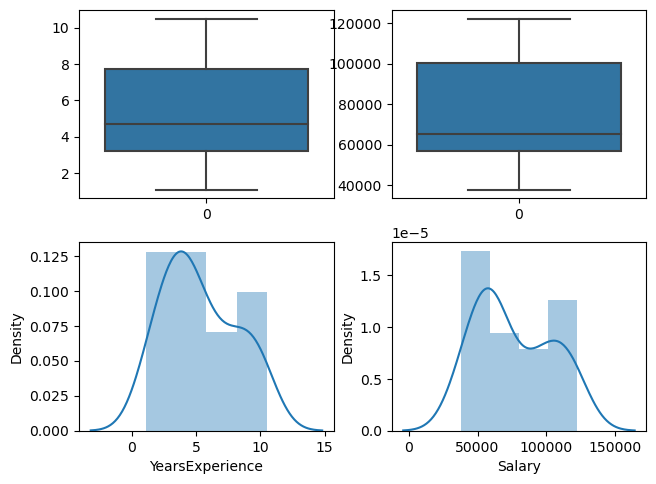

In [11]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(df['YearsExperience'], ax = ax[0,0])
sns.boxplot(df['Salary'], ax = ax[0,1])
sns.distplot(df['YearsExperience'], ax = ax[1,0])
sns.distplot(df['Salary'], ax = ax[1,1])

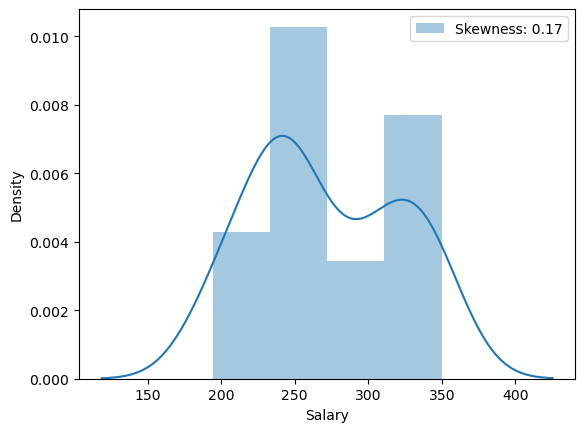

In [12]:
Sqrt_df = df["Salary"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_df,label="Skewness: %.2f"%(Sqrt_df.skew()) )
t.legend()

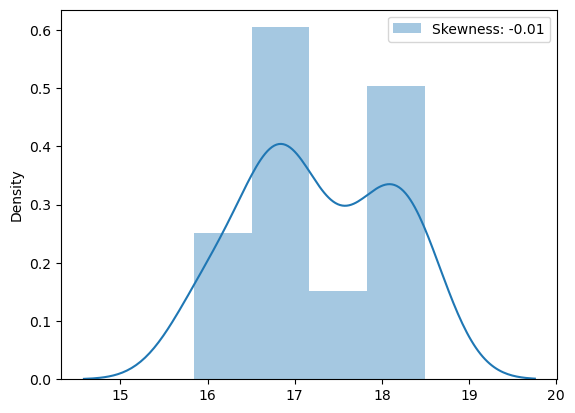

In [13]:
Boxcox_Salary = df["Salary"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_Salary= stats.boxcox(Boxcox_Salary)
Boxcox_Salary= pd.Series(Boxcox_Salary[0])
t=sns.distplot(Boxcox_Salary,label="Skewness: %.2f"%(Boxcox_Salary.skew()) )
t.legend()

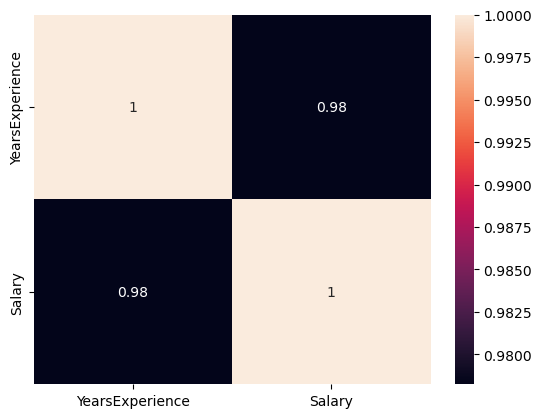

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

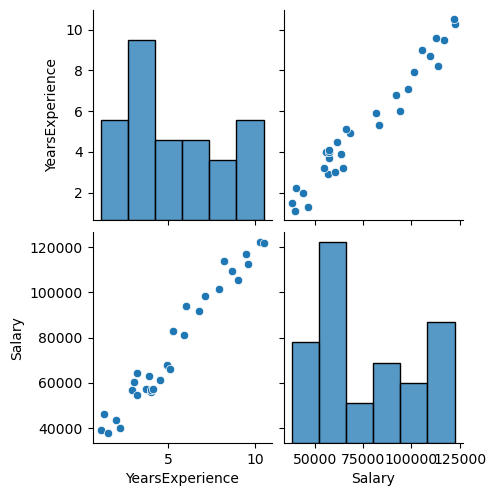

In [15]:
sns.pairplot(df)
plt.show()

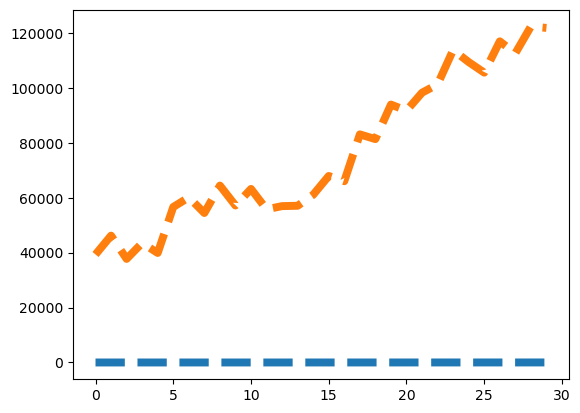

In [16]:
plt.plot(df, linestyle = '--', linewidth='5.7')

plt.show()

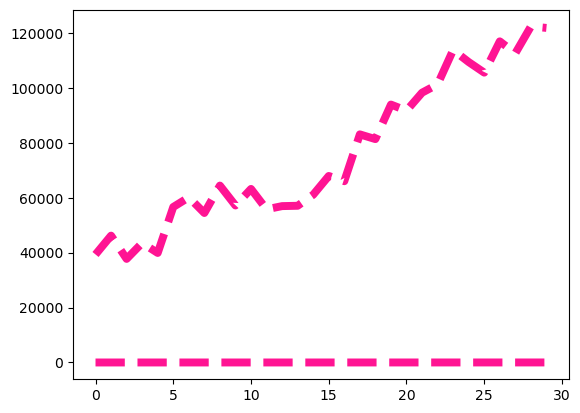

In [17]:
plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')

plt.show()

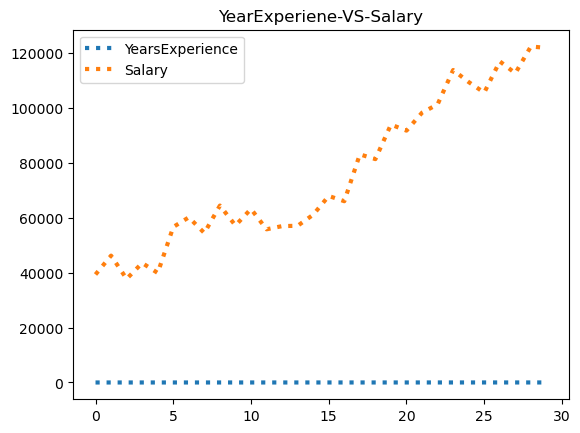

In [18]:
df.plot.line(linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

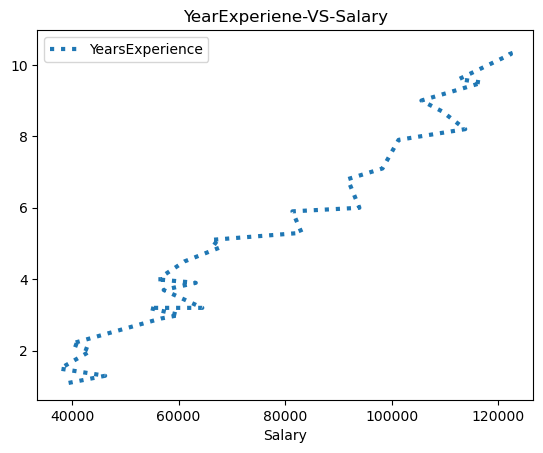

In [19]:
df = pd.DataFrame(data=df)

df.plot.line(x='Salary',linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

In [20]:
X=df.drop('Salary',axis=1)

In [21]:
y=df.Salary

In [22]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [23]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [26]:
print(X_train.shape)

(21, 1)


In [27]:
X_test.shape

(9, 1)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LR=LinearRegression()

In [30]:
LR.fit(X_train,y_train)

LinearRegression()

In [31]:
LR.intercept_

26777.391341197632

In [32]:
LR.coef_        

array([9360.26128619])

In [33]:
y_pred=LR.predict(X_test)

In [34]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [35]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
Name: Salary, dtype: float64

In [36]:
from sklearn import metrics

In [37]:
R2=metrics.r2_score(y_test,y_pred)

In [38]:
R2

0.9740993407213511

In [39]:
print(metrics.mean_absolute_error(y_test,y_pred))

3737.4178618788987


In [40]:
print(metrics.mean_squared_error(y_test,y_pred))

23370078.800832972


In [41]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4834.260936361728


In [42]:
error= y_test-y_pred

In [43]:
error

2    -3086.783270
28    -797.082589
13   -8073.462615
10     -64.410357
26    1269.126440
24    1219.335469
27   -4000.899689
11   -8424.436486
17    6701.223842
Name: Salary, dtype: float64

In [44]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

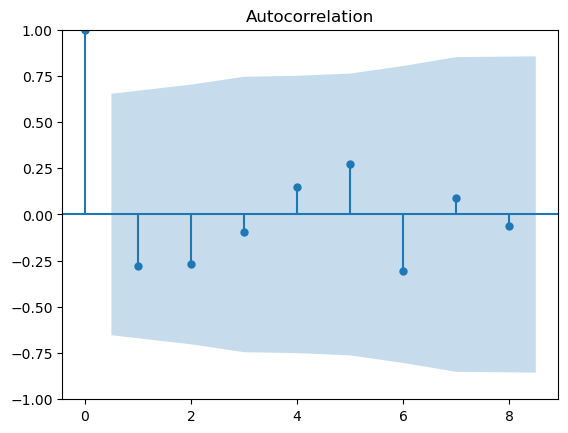

In [45]:
acf=plot_acf(error)
plt.show()

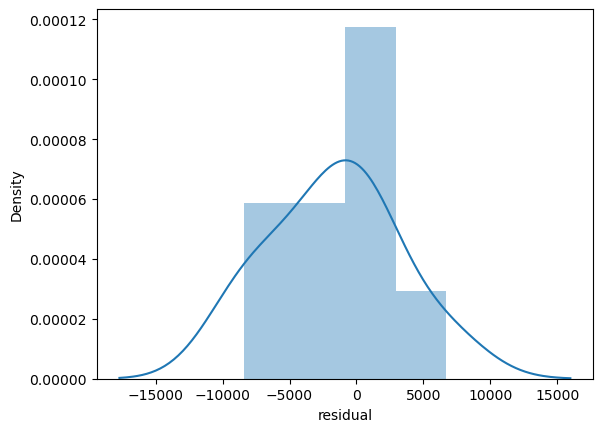

In [46]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

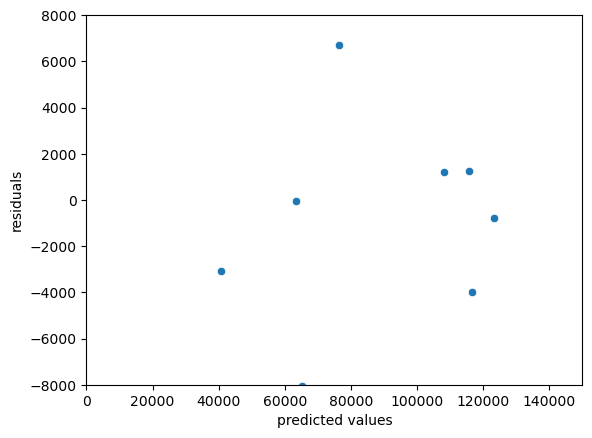

In [47]:
sns.scatterplot(x=y_pred,y=error)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim([0,150000])
plt.ylim([-8000,8000])
plt.show()

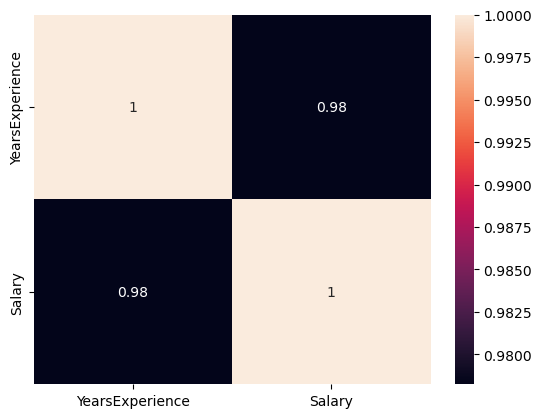

In [48]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Transforming the Data

In [49]:
df['log_YearsExperience'] = np.log(df['YearsExperience'])
df['log_Salary'] = np.log(df['Salary'])

df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


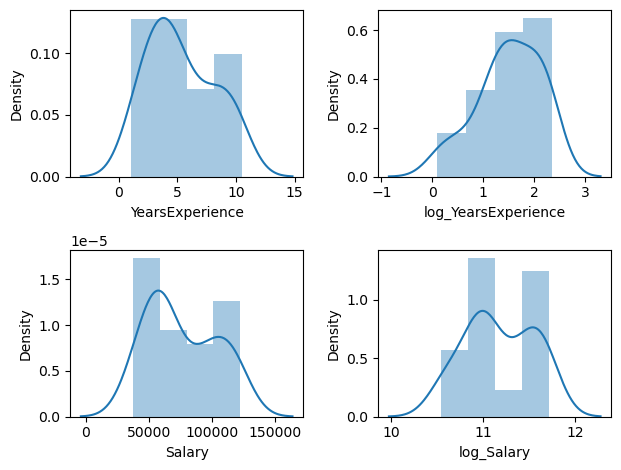

In [50]:
fig, ax = plt.subplots(2,2)

sns.distplot(df['YearsExperience'], ax = ax[0,0])
sns.distplot(df['log_YearsExperience'], ax = ax[0,1])
sns.distplot(df['Salary'], ax = ax[1,0])
sns.distplot(df['log_Salary'], ax = ax[1,1])
plt.tight_layout()

## Sqrt Transformation

In [51]:
df['sqrt_YearsExperience'] = np.sqrt(df['YearsExperience'])
df['sqrt_Salary'] = np.sqrt(df['Salary'])

df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_YearsExperience,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314


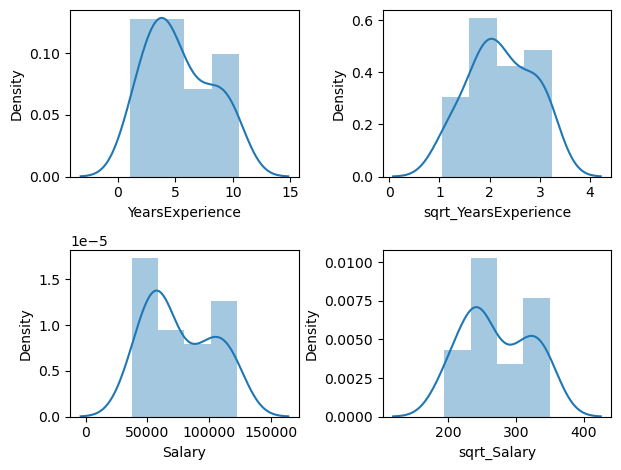

In [52]:
fig, ax = plt.subplots(2,2)

sns.distplot(df['YearsExperience'], ax = ax[0,0])
sns.distplot(df['sqrt_YearsExperience'], ax = ax[0,1])
sns.distplot(df['Salary'], ax = ax[1,0])
sns.distplot(df['sqrt_Salary'], ax = ax[1,1])
plt.tight_layout()

# Building Model from the Data

## Creating Model with Original Data

In [53]:
org_model = smf.ols('YearsExperience~Salary', data=df).fit()

In [54]:
print('\n T-Value of model wtin orignal value', '\n', org_model.tvalues)
print('\n P-Value of model wtin orignal value', '\n', org_model.pvalues)


 T-Value of model wtin orignal value 
 Intercept    -7.281283
Salary       24.950094
dtype: float64

 P-Value of model wtin orignal value 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [55]:
org_model.rsquared

0.9569566641435086

As accuracy of the model with orignal data is fine, we can retain are model with orignal data.

## Creating Model with Sqrt Data

In [56]:
sqrt_model = smf.ols('sqrt_YearsExperience~sqrt_Salary', data=df).fit()

In [57]:
print('\n T-Value of model wtin Sqrt value', '\n', sqrt_model.tvalues)
print('\n P-Value of model wtin Sqrt value', '\n', sqrt_model.pvalues)


 T-Value of model wtin Sqrt value 
 Intercept      -7.208167
sqrt_Salary    21.315126
dtype: float64

 P-Value of model wtin Sqrt value 
 Intercept      7.599072e-08
sqrt_Salary    7.584326e-19
dtype: float64


In [58]:
sqrt_model.rsquared

0.9419490138976825

As we used sqrt data the accuracy of ar model decreased from 96% to 94%, so we will not use sqrt model as final model.

## Creating Model with Log Data

In [59]:
log_model = smf.ols('log_YearsExperience~log_Salary', data=df).fit()

In [60]:
print('\n T-Value of model wtin log value', '\n', org_model.tvalues)
print('\n P-Value of model wtin log value', '\n', org_model.pvalues)


 T-Value of model wtin log value 
 Intercept    -7.281283
Salary       24.950094
dtype: float64

 P-Value of model wtin log value 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [61]:
log_model.rsquared

0.9052150725817147

As we used log data the accuracy of ar model decreased from 96% to 90%, so we will using model with orignal data as final model.